### 4D 블록 EDA
--------
*   최근에 EDA시작하여서 다소 부족한 면이 있습니다.
*   피드백을 주시면 수정/추가 하도록 하겠습니다.
*   많은 댓글 부탁드립니다!

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn")
colors = sns.color_palette("muted", 10)
sns.set(font='NanumBarunGothic', font_scale=1.5)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df_train = pd.read_csv("4D_block/train.csv")
df_test = pd.read_csv("4D_block/test.csv")
df_train.head()

,id,img_path,A,B,C,D,E,F,G,H,I,J
0,TRAIN_00000,./train/TRAIN_00000.jpg,1,0,0,0,0,0,0,0,0,0
1,TRAIN_00001,./train/TRAIN_00001.jpg,1,0,0,0,0,0,0,0,0,0
2,TRAIN_00002,./train/TRAIN_00002.jpg,1,0,0,0,0,0,0,0,0,0
3,TRAIN_00003,./train/TRAIN_00003.jpg,1,0,0,0,0,0,0,0,0,0
4,TRAIN_00004,./train/TRAIN_00004.jpg,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

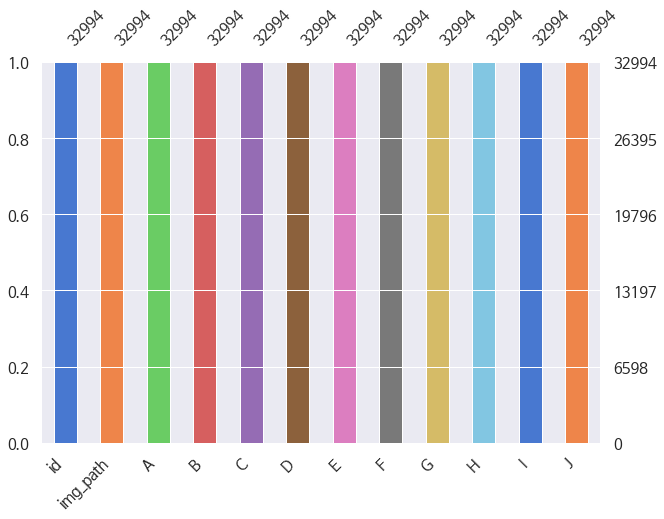

In [3]:
# 결측치 확인
# 결측치는 따로 없습니다
msno.bar(df_train, figsize=(10,7), fontsize=15, color=colors)

### 이미지에 대한 정보 추가
-------------------
*   이미지의 width, height 정보도 중요하다고 판단하여 DataFrame에 넣어봤습니다.
*   Train, Test 모두 400 x 400 사이즈 이미지를 가지고 있습니다

In [4]:
def add_img_info(dataframe):
    width  = []
    height = []
    size   = []
    for idx, d in enumerate(dataframe['img_path']):
        path = os.path.join("4D_block", d)
        img = cv2.imread(path)
        h, w, c = img.shape
        height.append(h)
        width.append(w)
        size.append(h*w)
    dataframe['width'] = width
    dataframe['height'] = height
    dataframe['img_size'] = size
    return dataframe

In [5]:
df_train = add_img_info(df_train)
df_test = add_img_info(df_test)

<AxesSubplot:xlabel='width,height,img_size'>

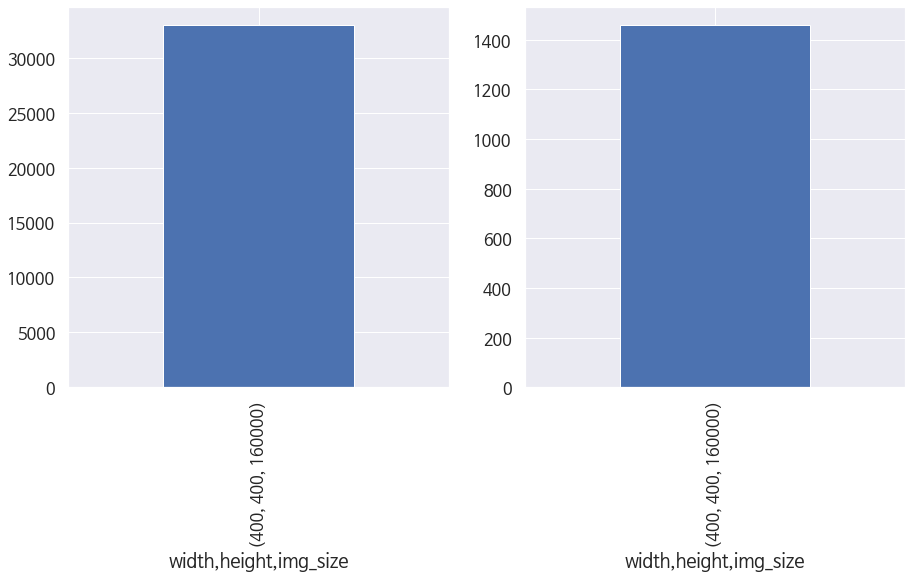

In [14]:
f, ax = plt.subplots(1,2, figsize=(15,7))
df_train[['width', 'height', 'img_size']].value_counts().plot.bar(ax=ax[0])
df_test[['width', 'height', 'img_size']].value_counts().plot.bar(ax=ax[1])

### 라벨 정보 파악하기
------
*   라벨의 분포를 확인하기 위하여 10개의 class에 대한 분포를 알아보았습니다
*   모두 비슷한 비율로 0과 1이 라벨링된 것을 보실 수 있습니다.

In [54]:
# 바 위에 text표시하기
def bar_text(ax, y=True):
    if y:
        for p in ax.patches:
            #height = p.get_height()
            width = p.get_width()
            ax.text(width + 3, p.get_y() + p.get_height() / 2., width, ha = 'center', size=12)
            #ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
    else:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 12)

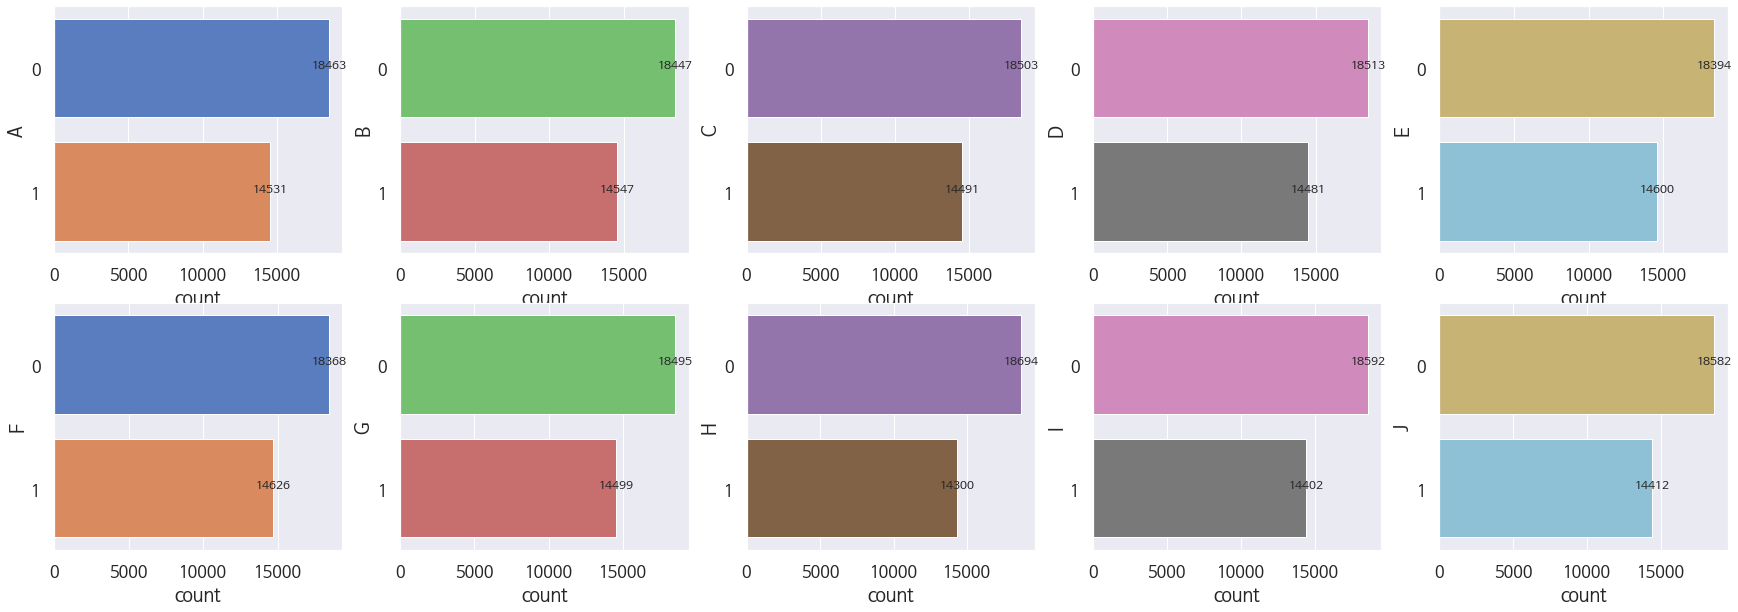

In [55]:
f, ax = plt.subplots(2, 5, figsize=(30,10))
bar_text(sns.countplot(data=df_train, y='A', ax=ax[0][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='B', ax=ax[0][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='C', ax=ax[0][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='D', ax=ax[0][3], palette=colors[6:8]))
bar_text(sns.countplot(data=df_train, y='E', ax=ax[0][4], palette=colors[8:10]))
bar_text(sns.countplot(data=df_train, y='F', ax=ax[1][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='G', ax=ax[1][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='H', ax=ax[1][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='I', ax=ax[1][3], palette=colors[6:8]))
bar_text(sns.countplot(data=df_train, y='J', ax=ax[1][4], palette=colors[8:10]))



### 특정 클래스일 때 다른 클래스의 분포

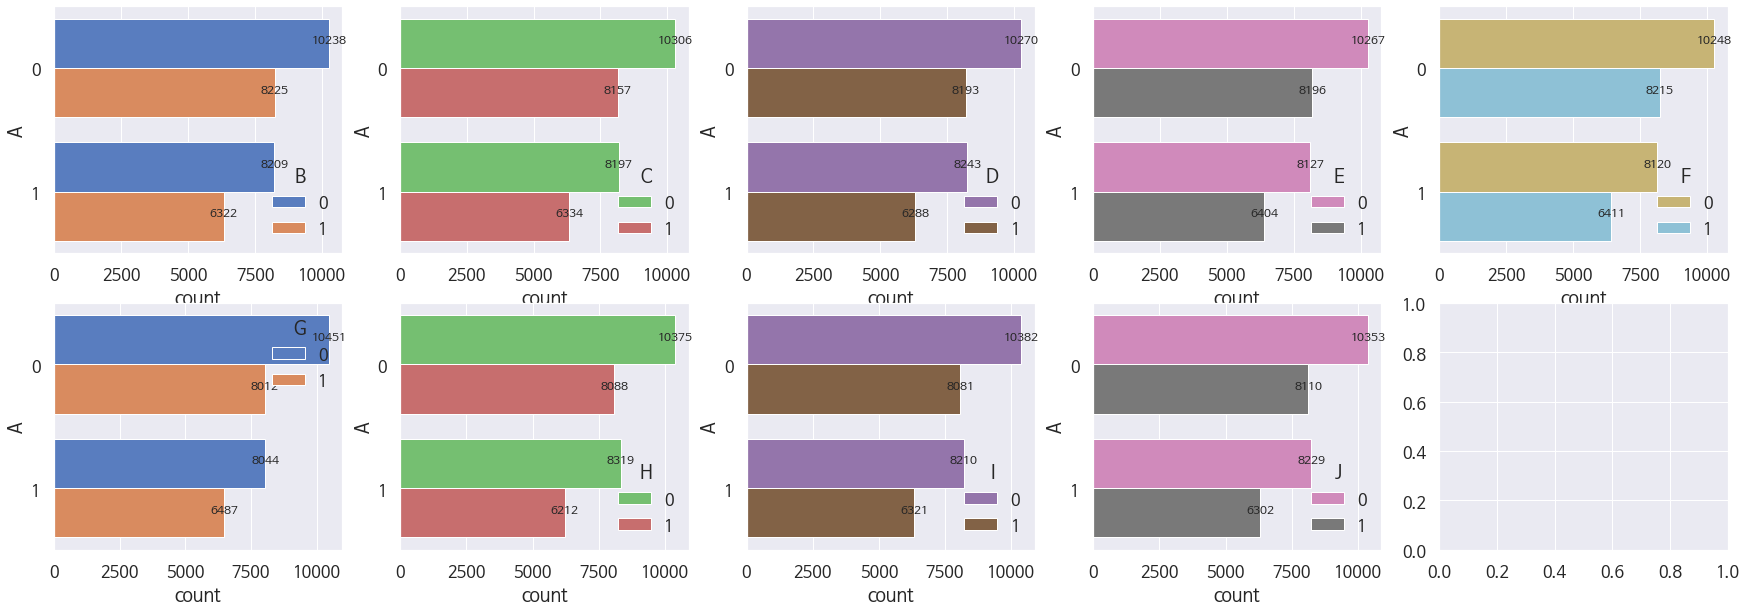

In [56]:
# A일 때 다른 클래스 분포
f, ax = plt.subplots(2, 5, figsize=(30,10))
bar_text(sns.countplot(data=df_train, y='A', hue='B', ax=ax[0][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='A', hue='C', ax=ax[0][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='A', hue='D', ax=ax[0][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='A', hue='E', ax=ax[0][3], palette=colors[6:8]))
bar_text(sns.countplot(data=df_train, y='A', hue='F', ax=ax[0][4], palette=colors[8:10]))
bar_text(sns.countplot(data=df_train, y='A', hue='G', ax=ax[1][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='A', hue='H', ax=ax[1][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='A', hue='I', ax=ax[1][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='A', hue='J', ax=ax[1][3], palette=colors[6:8]))

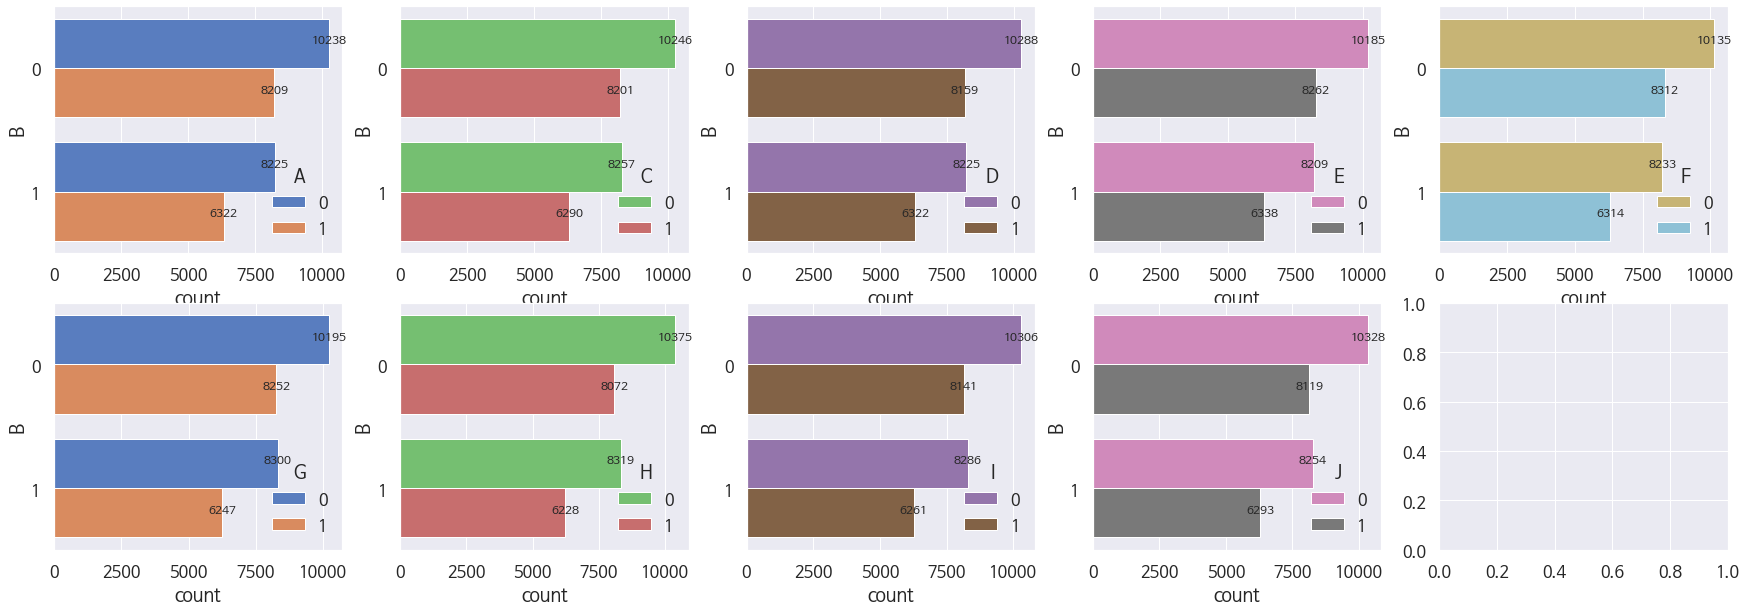

In [57]:
# B일때 다른 클래스 분포
f, ax = plt.subplots(2, 5, figsize=(30,10))
bar_text(sns.countplot(data=df_train, y='B', hue='A', ax=ax[0][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='B', hue='C', ax=ax[0][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='B', hue='D', ax=ax[0][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='B', hue='E', ax=ax[0][3], palette=colors[6:8]))
bar_text(sns.countplot(data=df_train, y='B', hue='F', ax=ax[0][4], palette=colors[8:10]))
bar_text(sns.countplot(data=df_train, y='B', hue='G', ax=ax[1][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='B', hue='H', ax=ax[1][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='B', hue='I', ax=ax[1][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='B', hue='J', ax=ax[1][3], palette=colors[6:8]))

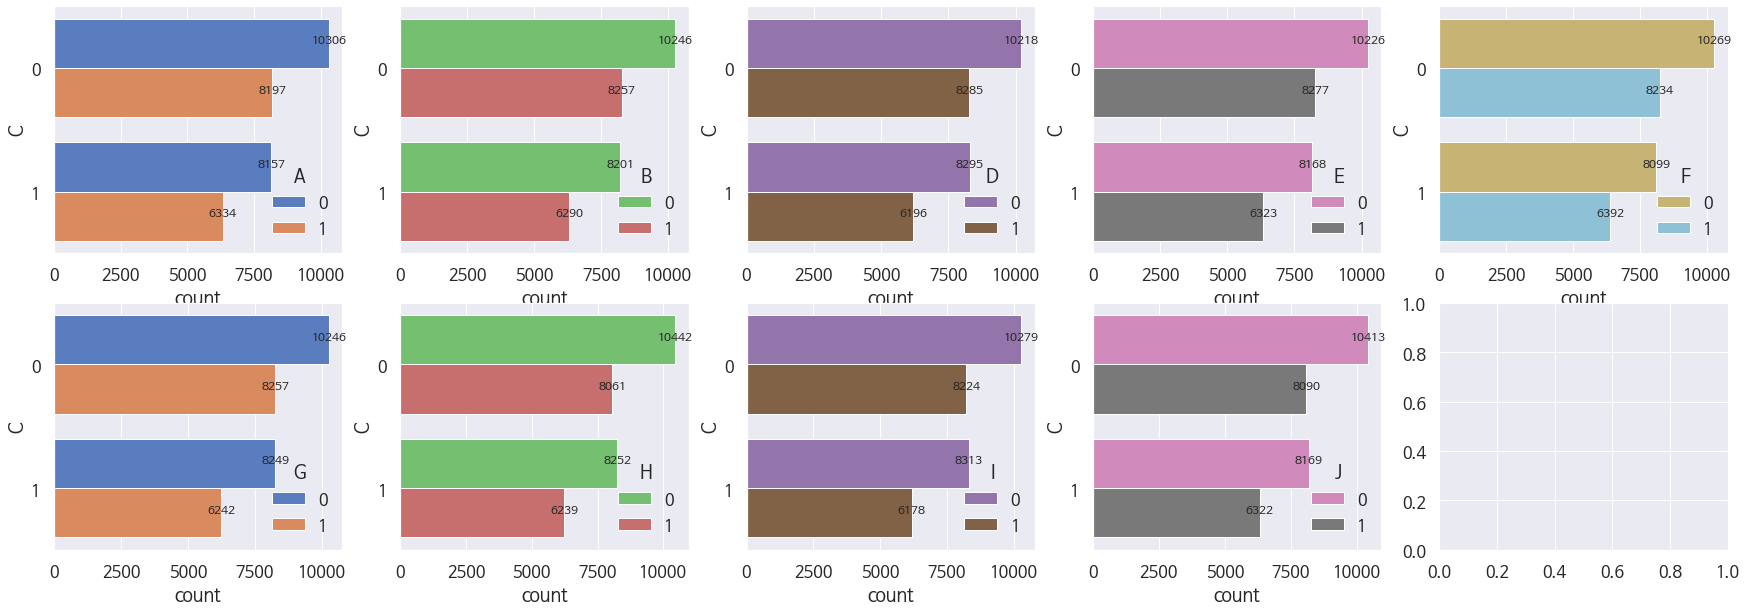

In [59]:
# C일때 다른 클래스 분포
f, ax = plt.subplots(2, 5, figsize=(30,10))
bar_text(sns.countplot(data=df_train, y='C', hue='A', ax=ax[0][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='C', hue='B', ax=ax[0][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='C', hue='D', ax=ax[0][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='C', hue='E', ax=ax[0][3], palette=colors[6:8]))
bar_text(sns.countplot(data=df_train, y='C', hue='F', ax=ax[0][4], palette=colors[8:10]))
bar_text(sns.countplot(data=df_train, y='C', hue='G', ax=ax[1][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='C', hue='H', ax=ax[1][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='C', hue='I', ax=ax[1][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='C', hue='J', ax=ax[1][3], palette=colors[6:8]))

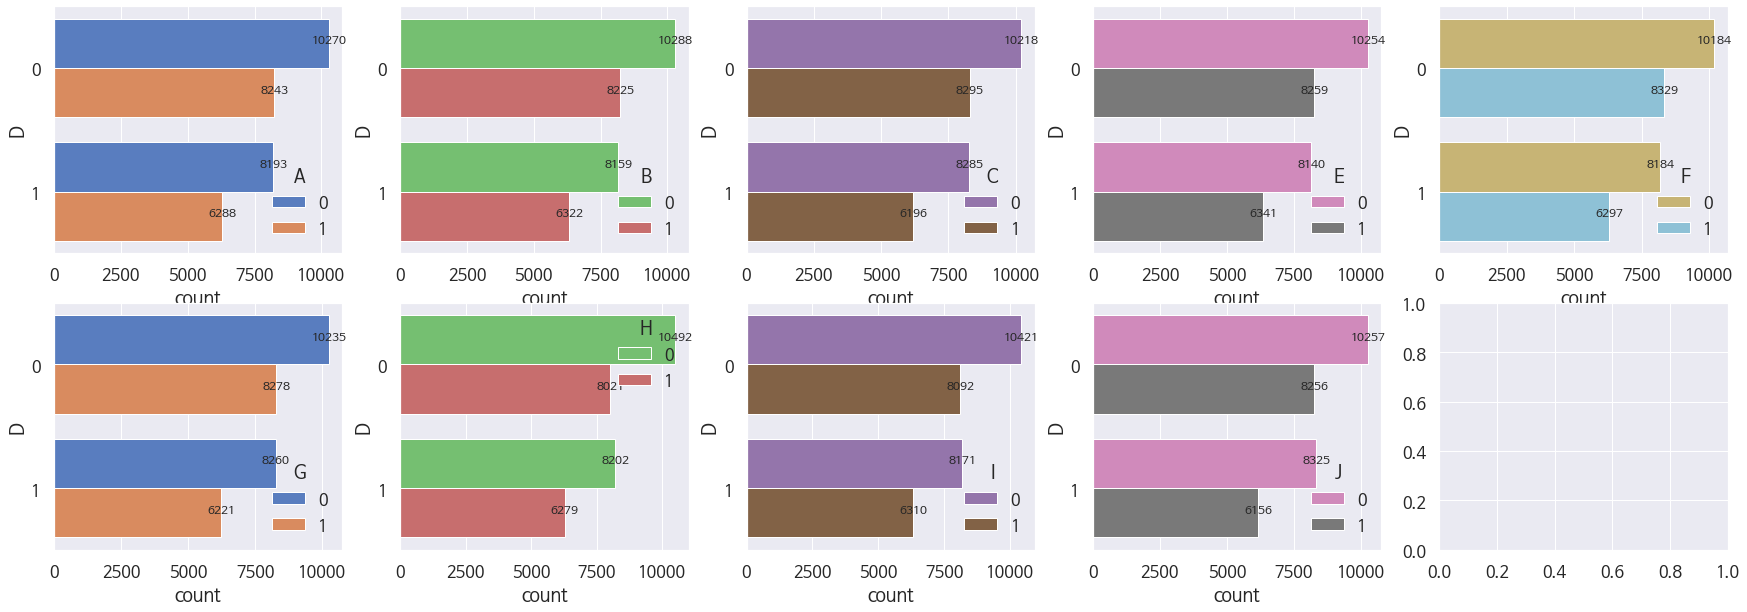

In [60]:
# D일때 다른 클래스 분포
f, ax = plt.subplots(2, 5, figsize=(30,10))
bar_text(sns.countplot(data=df_train, y='D', hue='A', ax=ax[0][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='D', hue='B', ax=ax[0][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='D', hue='C', ax=ax[0][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='D', hue='E', ax=ax[0][3], palette=colors[6:8]))
bar_text(sns.countplot(data=df_train, y='D', hue='F', ax=ax[0][4], palette=colors[8:10]))
bar_text(sns.countplot(data=df_train, y='D', hue='G', ax=ax[1][0], palette=colors[0:2]))
bar_text(sns.countplot(data=df_train, y='D', hue='H', ax=ax[1][1], palette=colors[2:4]))
bar_text(sns.countplot(data=df_train, y='D', hue='I', ax=ax[1][2], palette=colors[4:6]))
bar_text(sns.countplot(data=df_train, y='D', hue='J', ax=ax[1][3], palette=colors[6:8]))

*   나머지에 대한 결과도 비율이 모두 동일하기 때문에 스킵하겠습니다


### 데이터 시각화
---
*   라벨은 모두 비슷한 비중으로 분포되어있는 것을 확인하였습니다 (56:44)
*   이젠 실제로 A가 0 또는 1일때 어떻게 생겼는지 확인해보자 합니다
*   코드는 [여기](https://www.dacon.io/competitions/official/236042/codeshare/7363?page=1&dtype=recent)를 참고하였습니다.

In [77]:
def show_image(Image, Picture_Name):
    plt.figure(figsize=(7,7))
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()

def sample_df_by_attr(df, n_sample, attr_name, use_frac=False):
    cond = (df[attr_name] == 1)
    df = df.loc[cond]
    if use_frac == True:
        df = df.sample(frac=n_sample)
    else:
        df = df.sample(n=n_sample)
    return df

def sample_all_df_by_attr(df, attr_name, use_frac=False):
    cond = (df[attr_name] == 1)
    df = df.loc[cond]
    return df

def show_sample_image_by_attr(df, n_sample, attr_names:list):
    if len(attr_names):
        for attr_name in attr_names[:-1]:
            df = sample_all_df_by_attr(df, attr_name)
        attr_name = attr_names[-1]
        df = sample_df_by_attr(df, n_sample, attr_name)
        for img, attr in zip(df['img_path'], df[attr_name]):
            print(img)
            # 이 부분은 제 경로에 맞게 설정하였습니다. 각자 경로를 맞게 설정해주세요
            img = cv2.imread(os.path.join("4D_block", img))
            # BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            show_image(img, attr)

./train/TRAIN_14739.jpg


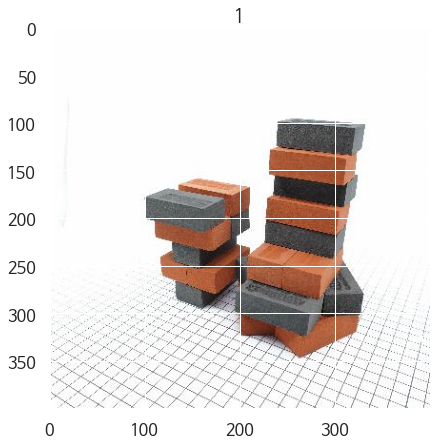

./train/TRAIN_17890.jpg


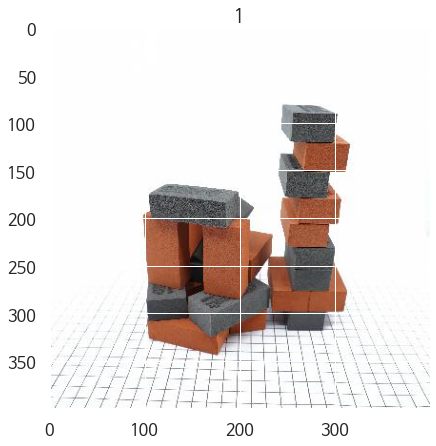

./train/TRAIN_11554.jpg


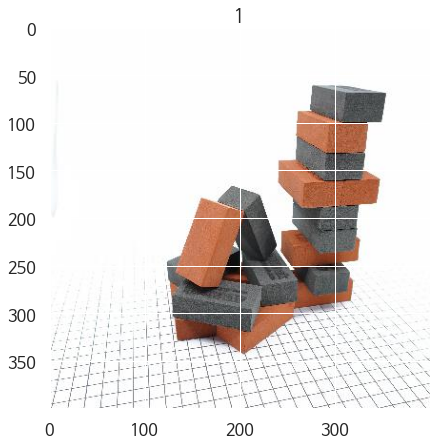

./train/TRAIN_32345.jpg


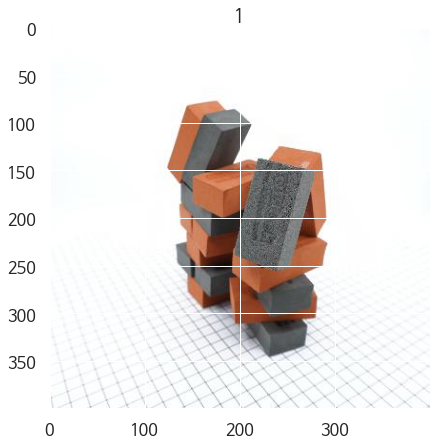

./train/TRAIN_22221.jpg


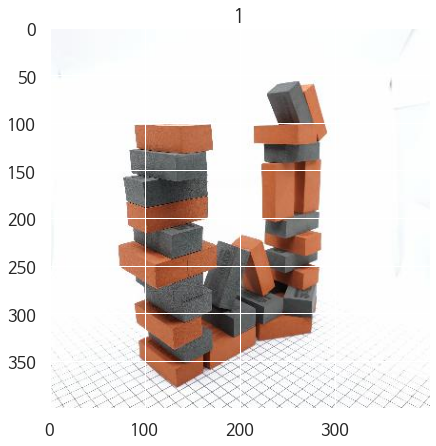

In [78]:
show_sample_image_by_attr(df_train, 1, ['A'])
show_sample_image_by_attr(df_train, 1, ['B'])
show_sample_image_by_attr(df_train, 1, ['C'])
show_sample_image_by_attr(df_train, 1, ['D'])
# TRAIN_22221,./train/TRAIN_22221.jpg,1,1,1,1,1,1,1,1,1,1 인걸 보니 알맞게 시각화를 한것 같습니다.
show_sample_image_by_attr(df_train, 1, ['A','B','C','D','E','F','G','H','I','J'])

### 마치며
*   제가 데이터 분석에 대해 조예가 깊지 않다보니 이 정도밖에 생각이 나지 않습니다.
*   만약 좋은 아이디어가 있으시다면 꼭 댓글로 적어주시면 감사하겠습니다. (바로 추가하도록 해보겠습니다)
*   (1차 수정) cv2는 원래 BGR받는걸 잊고 있었네요 RGB로 변환하는 코드 추가했습니다.